In [1]:
import pandas as pd
import numpy as np


In [1]:
train_region = "Austin"
test_region = "SanDiego"
appliance = "fridge"
feature = "Monthly"
strategy_list = ["None","CDD","median-aggregate"][:]
import glob

In [2]:
out = {}
for train_region in ["SanDiego"]:
    for strategy in strategy_list:
        try:
            directory = '../data/output/cross/%s_%s_%s_%s_%s/' % (train_region, 
                                                                    test_region,
                                                                     strategy,
                                                                    appliance,

                                                                   feature)
            home_files = glob.glob(directory+"*.csv")
            out[strategy] = {}
            homes = []
            
            for home_file in home_files:
                home = int(home_file.split("/")[-1][:-4])
                homes.append(home)
                df = pd.read_csv(home_file, index_col=0, header=None).squeeze()
                df.index.name = "Month"
                out[strategy][home]=df
        except:
            pass

In [3]:
for strategy in ['None']:
    print strategy, pd.DataFrame(out[strategy]).T.describe()

None

NameError: name 'pd' is not defined

In [24]:
acc={strategy:pd.DataFrame(out[strategy]).mean(axis=1) for strategy in strategy_list}




In [25]:
%matplotlib inline

In [26]:
acc_df = pd.DataFrame(acc)
#acc_df.plot(kind="bar",rot=0)
acc_df
acc_df

,CDD,None,median-aggregate
Month,,,
7,75.848187,81.664574,46.464435
8,74.366826,80.605162,42.193320
9,70.523686,79.668414,62.166533


In [43]:
acc_df['Train on SD'] = pd.Series({7:80,8:82,9:81})

In [44]:
acc_df = acc_df.rename(columns={'None':'Train on Austin, No transformation'})

In [45]:
acc_df = acc_df.rename(columns={'CDD':'Train on Austin, Transformation by CDD'})

In [46]:
acc_df = acc_df.rename(columns={'median-aggregate':'Train on Austin, Transformation by median'})

In [47]:
acc_df.columns

Index([u'Train on Austin, Transformation by CDD',
       u'Train on Austin, No transformation',
       u'Train on Austin, Transformation by median', u'Train on SD'],
      dtype='object')

In [48]:
acc_df = acc_df[['Train on Austin, No transformation','Train on Austin, Transformation by CDD',
                 'Train on Austin, Transformation by median','Train on SD']]

In [49]:
import sys
sys.path.append("../code/")

In [50]:
from common_functions import tableau20blind, format_axes

In [51]:
acc_df['Regional average'] = pd.Series({7:72, 8:74, 9:73})

In [52]:
acc_df = acc_df[['Regional average', u'Train on Austin, No transformation',
       u'Train on Austin, Transformation by CDD',
       u'Train on Austin, Transformation by median', u'Train on SD']]

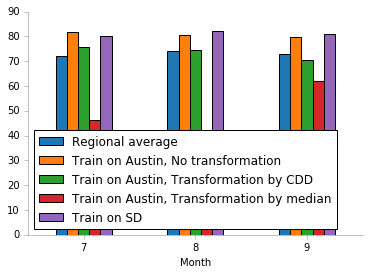

In [54]:
import matplotlib.pyplot as plt
acc_df.plot(kind="bar",rot=0, colors=tableau20blind[::2]).legend(loc=3)
format_axes(plt.gca())
plt.savefig("../results/cross_fridge_austin_sd.pdf")
plt.savefig("../results/cross_fridge_austin_sd.png")